In [1]:
import numpy as np
import sisl

In [8]:
# Carbon-carbon bond length in Angstrom
a_cc = 1.42

# Lattice vectors for a 2D graphene unit cell
a1 = [3 / 2 * a_cc, np.sqrt(3) / 2 * a_cc, 0.0]
a2 = [3 / 2 * a_cc, -np.sqrt(3) / 2 * a_cc, 0.0]
a3 = [0.0, 0.0, 20.0]  # vacuum in z

lattice = sisl.Lattice([a1, a2, a3])

# Atomic positions
pos = [
    [0.0, 0.0, 0.0],
    [1.42, 0, 0.0],
    [0.0, 0.0, 0.0],
]

atoms = [
    sisl.Atom(6),  # Carbon
    sisl.Atom(6),  # Carbon
    sisl.Atom(1),
]

# Build geometry
geom = sisl.Geometry(pos, atoms, lattice=lattice)
hamiltonian = sisl.Hamiltonian(geom)

t = 1.0
V = 0.0

hamiltonian.H[0, 1] = -t
hamiltonian.H[1, 0] = -t
hamiltonian.H[0, 2] = V
hamiltonian.H[2, 0] = V

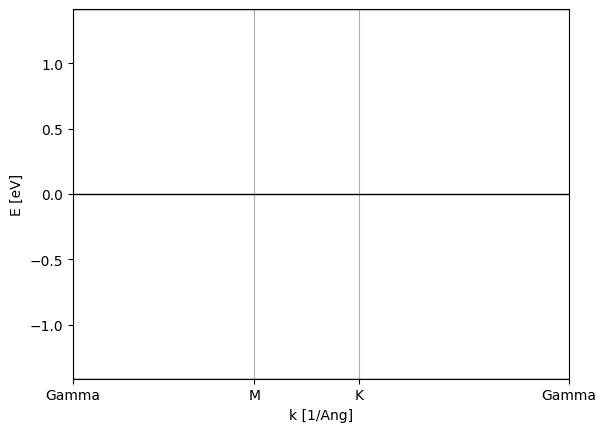

In [7]:
band = sisl.BandStructure(
    hamiltonian,
    [[0, 0, 0], [0, 0.5, 0], [1 / 3, 2 / 3, 0], [0, 0, 0]],
    200,
    [r"Gamma", r"M", r"K", r"Gamma"],
)
band.plot(Erange=(-3, 3), backend="matplotlib")